# K-means clustering

## Exploratory data analysis: mall customer segmentation data (kaggle)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df1 = pd.read_csv("The Muggle Sorting Hat DataSet.csv")
df1["Gender"] = df1["Gender"].str.replace(" ", "")
df1["District"] = df1["District"].str.replace(" ", "")
df1.head()

,Name,Gender,Age,District,Friend 1,Friend 2
0,Betty Allison,female,10,Pandora,Molly Meer,Jessica Zebra
1,Peter Alexs,male,10,Limsa,G�nther Cohl,Ceasar Feige
2,Gregor Allmann,male,11,Pandora,Bert Edamer,Ceasar Feige
3,Tiffany Becks,female,10,Pandora,Ally Inka,Sally Brot
4,Sally Brot,female,10,Limsa,Tiffany Becks,Betty Allison


In [2]:
#df1.rename(columns = {"Annual Income (k$)":"Income", "Spending Score (1-100)":"Spending Score"}, inplace = True)
#df1.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df1.describe()

,Age
count,80.000000
mean,10.112500
std,0.317974
min,10.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,11.000000


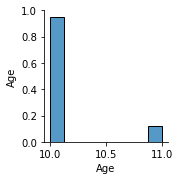

In [26]:
sns.pairplot(df1[["Age", "District", "Gender"]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


male      41
female    39
Name: Gender, dtype: int64

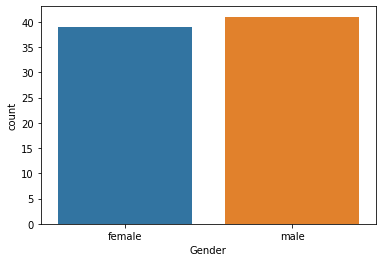

In [30]:
sns.countplot(df1["Gender"])
df1["Gender"].value_counts()

In [33]:
df1["District"].value_counts()

Pandora       19
Uldah         17
Limsa         15
Queensdale    11
Gridania      11
Reach          7
Name: District, dtype: int64

In [36]:
dic = {"Pandora" : "0", "Uldah" : "1", "Limsa" : "2", "Queensdale" : "3", "Gridania" : "4", "Reach" : "5"}

for old, new in dic.items():
    df1['District'] = df1['District'].str.replace(old, new, regex=False)

In [37]:
df1.head()

,Name,Gender,Age,District,Friend 1,Friend 2
0,Betty Allison,female,10,0,Molly Meer,Jessica Zebra
1,Peter Alexs,male,10,2,G�nther Cohl,Ceasar Feige
2,Gregor Allmann,male,11,0,Bert Edamer,Ceasar Feige
3,Tiffany Becks,female,10,0,Ally Inka,Sally Brot
4,Sally Brot,female,10,2,Tiffany Becks,Betty Allison


## Clustering mall customer segmentation data

In [38]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
kmeans = kmeans.fit(df1[["District", "Age"]])
kmeans.cluster_centers_

array([[ 1.        , 10.11764706],
       [ 4.38888889, 10.        ],
       [ 0.        , 10.26315789],
       [ 3.        , 10.18181818],
       [ 2.        , 10.        ]])

In [39]:
df1["Clusters"] = kmeans.labels_
df1.head(10)

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,Betty Allison,female,10,0,Molly Meer,Jessica Zebra,2
1,Peter Alexs,male,10,2,G�nther Cohl,Ceasar Feige,4
2,Gregor Allmann,male,11,0,Bert Edamer,Ceasar Feige,2
3,Tiffany Becks,female,10,0,Ally Inka,Sally Brot,2
4,Sally Brot,female,10,2,Tiffany Becks,Betty Allison,4
5,Nancy Click,female,11,1,Zoe Jutter,Amanda Fredericks,0
6,G�nther Cohl,male,10,1,Ceasar Feige,Peter Alexs,0
7,Johnny Cedar,male,10,4,Marvin Geige,Leo Jackson,1
8,Mathilda Damm,female,10,2,Yule Hoffnung,Zoe Jutter,4
9,Bert Edamer,male,10,1,Peter Alexs,G�nther Cohl,0


In [40]:
df1["Clusters"].value_counts()

2    19
1    18
0    17
4    15
3    11
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='District'>

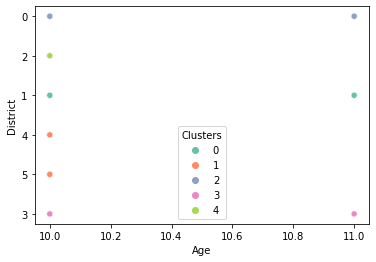

In [41]:
sns.scatterplot(data = df1, x = "Age", y = "District", hue = "Clusters", palette = "Set2")

## Creating diverse customer groups

In [9]:
"""
First function creates list a of clustered dataframes (one df per cluster); second function takes list a,
splits clustered dataframes into required number of diverse groups (splits) and adds them to list b; third function 
combines splitted dataframes in list b into new (diverse) dataframes and adds them to list c.
"""
from functools import reduce

def create_clustered_dataframes(df):
    dataframes = []
    for i in df.Clusters.unique():
        temporary_df = df[df["Clusters"] == i]
        dataframes.append(temporary_df)
    return dataframes

clustered_dataframes = create_clustered_dataframes(df1)
clustered_dataframes[0]


,CustomerID,Gender,Age,Income,Spending Score,Clusters
0,1,Male,19,15,39,2
2,3,Female,20,16,6,2
4,5,Female,31,17,40,2
6,7,Female,35,18,6,2
8,9,Male,64,19,3,2
10,11,Male,67,19,14,2
12,13,Female,58,20,15,2
14,15,Male,37,20,13,2
16,17,Female,35,21,35,2
18,19,Male,52,23,29,2


In [10]:
def split_dataframes(clustered_list, splits):
    dataframes_split = []
    for i in clustered_list: 
        index_to_split = (-(-len(i)//splits))
        start = 0
        end = index_to_split
        for split in range(splits):
            temporary_df = i.iloc[start:end, :]
            dataframes_split.append(temporary_df)
            start += index_to_split
            end += index_to_split
    return dataframes_split

split_clustered_dataframes = split_dataframes(clustered_dataframes, 5)
split_clustered_dataframes[0]

,CustomerID,Gender,Age,Income,Spending Score,Clusters
0,1,Male,19,15,39,2
2,3,Female,20,16,6,2
4,5,Female,31,17,40,2
6,7,Female,35,18,6,2
8,9,Male,64,19,3,2


In [11]:
"""
Splits in split_dataframes_by_position has to be the same as splits in create_diverse_dataframes!
"""

def create_diverse_dataframes(split_list, splits):
    dataframes_diverse = []
    start = 0
    for split in range(splits):        
        if start <= splits - 1:
            new_dataframe_as_list = split_list[start::splits]
            new_dataframe = pd.concat(new_dataframe_as_list)
            dataframes_diverse.append(new_dataframe)
            start += 1
    return dataframes_diverse    
    
diverse_groups = create_diverse_dataframes(split_clustered_dataframes, 5)
diverse_groups[0].head(15)

,CustomerID,Gender,Age,Income,Spending Score,Clusters
0,1,Male,19,15,39,2
2,3,Female,20,16,6,2
4,5,Female,31,17,40,2
6,7,Female,35,18,6,2
8,9,Male,64,19,3,2
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3


## Visualising diverse groups

<AxesSubplot:xlabel='Income', ylabel='Spending Score'>

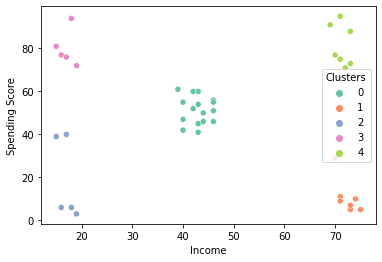

In [12]:
group = diverse_groups[0]
sns.scatterplot(data = group, x = "Income", y = "Spending Score", hue = "Clusters", palette = "Set2")

In [13]:
for group_temp in diverse_groups:
    print(group_temp["Clusters"].value_counts())
    print(len(group_temp))

0    17
4     8
1     7
2     5
3     5
Name: Clusters, dtype: int64
42
0    17
4     8
1     7
2     5
3     5
Name: Clusters, dtype: int64
42
0    17
4     8
1     7
2     5
3     5
Name: Clusters, dtype: int64
42
0    17
4     8
1     7
2     5
3     5
Name: Clusters, dtype: int64
42
0    13
1     7
4     7
2     3
3     2
Name: Clusters, dtype: int64
32


Problem: Groups are too different in size!

## Creating diverse customer groups (different approach)

In [14]:
def sort_dataframe(df):
    df["Clusters"] = pd.Categorical(df["Clusters"], [0, 1, 2, 3, 4])
    sorted_dataframe = df.sort_values("Clusters")
    return sorted_dataframe

sort_dataframe(df1).head()

,CustomerID,Gender,Age,Income,Spending Score,Clusters
99,100,Male,20,61,49,0
83,84,Female,46,54,44,0
82,83,Male,67,54,41,0
81,82,Male,38,54,55,0
80,81,Male,57,54,51,0


## Keeping two customers together: merging rows before clustering
    

In [15]:
df2 = df1.drop("Clusters", axis=1)

def merge_customers1(df, id1, id2):
    customer1 = df[df["CustomerID"] == id1]
    customer2 = df[df["CustomerID"] == id2]
    customer_id = [customer1.iloc[0,0], customer2.iloc[0,0]]
    average_age = (customer1.iloc[0,2] + customer2.iloc[0,2])/2
    average_income = (customer1.iloc[0,3] + customer2.iloc[0,3])/2
    average_spending_score = (customer1.iloc[0,4] + customer2.iloc[0,4])/2
    gender = [customer1.iloc[0,1], customer2.iloc[0,1]]
    merged_c = pd.DataFrame({"CustomerID": [customer_id],
                                      "Gender": [gender],
                                      "Age": [average_age],
                                      "Income": [average_income],
                                      "Spending Score": [average_spending_score]})
    return merged_c


merge_customers1(df2, 1, 2)

,CustomerID,Gender,Age,Income,Spending Score
0,"[1, 2]","[Male, Male]",20.0,15.0,60.0


In [16]:
def merge_customers2(df, id1, id2):
    customer1 = df[df["CustomerID"] == id1]
    customer2 = df[df["CustomerID"] == id2]
    customer_id = [customer1.iloc[0,0], customer2.iloc[0,0]]
    age = [customer1.iloc[0,2], customer2.iloc[0,2]]
    income = [customer1.iloc[0,3], customer2.iloc[0,3]]
    spending_score = [customer1.iloc[0,4], customer2.iloc[0,4]]
    gender = [customer1.iloc[0,1], customer2.iloc[0,1]]
    merged_c = pd.DataFrame({"CustomerID": [customer_id],
                                      "Gender": [gender],
                                      "Age": [age],
                                      "Income": [income],
                                      "Spending Score": [spending_score]})
    return merged_c


merge_customers2(df2, 1, 200)

,CustomerID,Gender,Age,Income,Spending Score
0,"[1, 200]","[Male, Male]","[19, 30]","[15, 137]","[39, 83]"


In [17]:
df4 = pd.DataFrame()
for number in range(1, 101):
    df_temp = df4.append(merge_customers1(df2, number, 100+number))
    df4 = df_temp
print(df4)
print(len(df4))

    CustomerID            Gender   Age  Income  Spending Score
0     [1, 101]    [Male, Female]  21.0    38.5            40.0
0     [2, 102]    [Male, Female]  35.0    38.5            64.5
0     [3, 103]    [Female, Male]  43.5    39.0            32.5
0     [4, 104]    [Female, Male]  24.5    39.0            66.0
0     [5, 105]    [Female, Male]  40.0    39.5            48.0
..         ...               ...   ...     ...             ...
0    [96, 196]    [Male, Female]  29.5    90.0            65.5
0    [97, 197]  [Female, Female]  46.0    93.0            37.5
0    [98, 198]    [Female, Male]  29.5    93.0            62.0
0    [99, 199]      [Male, Male]  40.0    99.0            30.0
0   [100, 200]      [Male, Male]  25.0    99.0            66.0

[100 rows x 5 columns]
100


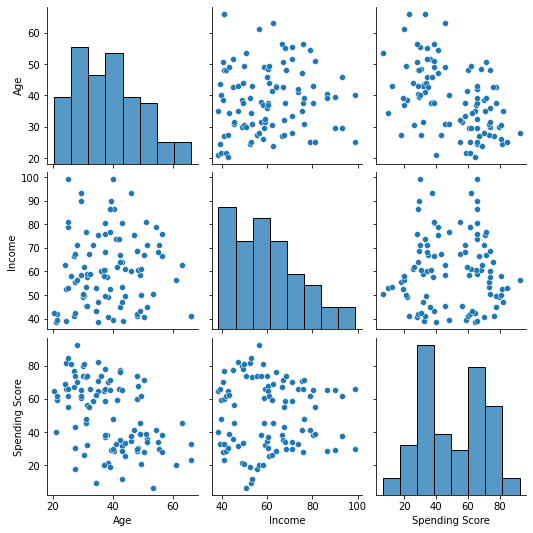

In [18]:
sns.pairplot(df4[["Age", "Income", "Spending Score"]])

When we try to cluster the new dataframe with merged customers, the original clusters are practically gone. But merged school children will have more in common (same previous school, probably gender) so may belong to the same cluster? Should we could think about categorising values to create clusters?